In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# matplotlib 라이브러리가 한국어를 지원 x 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
# plt.rcParams["font.family"] = "AppleGothic"  # Mac (애플 고딕)

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False


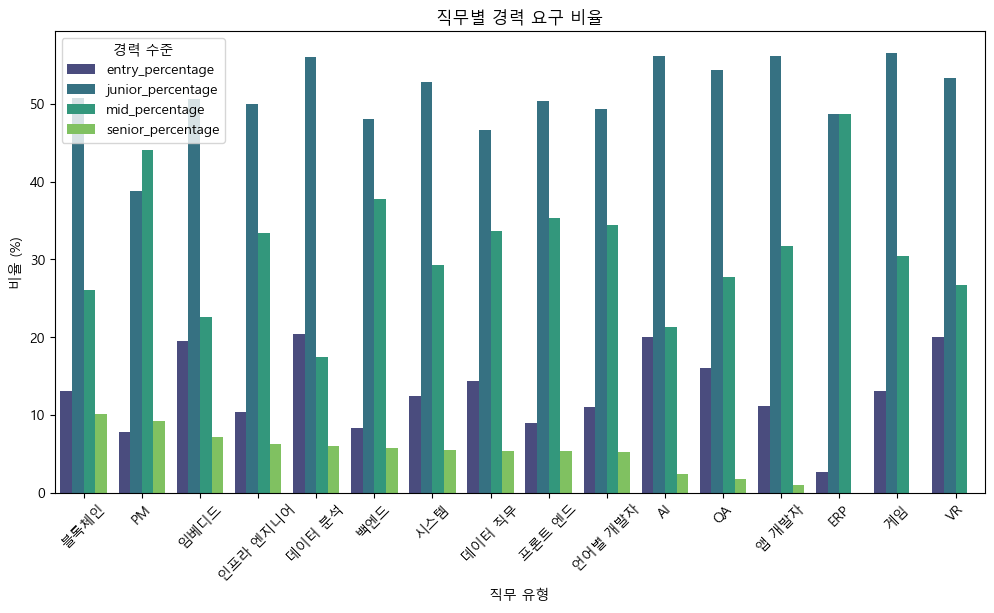

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로 (실제 경로 확인 필요)
conn = sqlite3.connect(db_path)  # DB 연결

# SQL 쿼리 실행 (직무별 경력 요구 비율 조회)
sql_query = """
WITH career_range AS (
    SELECT 
        category AS duty_category, 
        COUNT(*) AS total_jobs,
        SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) AS entry_level,
        SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) AS junior,
        SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) AS mid_level,
        SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) AS senior,
        ROUND(100.0 * SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS entry_percentage,
        ROUND(100.0 * SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) / COUNT(*), 2) AS junior_percentage,
        ROUND(100.0 * SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) / COUNT(*), 2) AS mid_percentage,
        ROUND(100.0 * SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) / COUNT(*), 2) AS senior_percentage
    FROM ( 
        SELECT 'PM' AS category, career FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, career FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, career FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, career FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, career FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, career FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, career FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, career FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, career FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, career FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, career FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, career FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, career FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, career FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, career FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, career FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    duty_category,
    total_jobs,
    entry_level,
    junior,
    mid_level,
    senior,
    entry_percentage,
    junior_percentage,
    mid_percentage,
    senior_percentage,
    CASE 
        WHEN senior_percentage >= 50 THEN '고급 경력직'
        WHEN mid_percentage >= 50 THEN '미드 경력직'
        WHEN junior_percentage >= 50 THEN '일반 주니어'
        ELSE '신입 가능'
    END AS career_level
FROM career_range
ORDER BY senior_percentage DESC, mid_percentage DESC, junior_percentage DESC;
"""

# 데이터 로드
df = pd.read_sql_query(sql_query, conn)
conn.close()  # DB 연결 해제

# 📊 시각화를 위한 데이터 변환
df_melted = df.melt(id_vars=["duty_category"], 
                    value_vars=["entry_percentage", "junior_percentage", "mid_percentage", "senior_percentage"],
                    var_name="경력 수준", value_name="비율 (%)")

# 📌 막대그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="duty_category", y="비율 (%)", hue="경력 수준", palette="viridis")

# 그래프 꾸미기
plt.xticks(rotation=45)
plt.xlabel("직무 유형")
plt.ylabel("비율 (%)")
plt.title("직무별 경력 요구 비율")
plt.legend(title="경력 수준")

# 그래프 출력
plt.show()


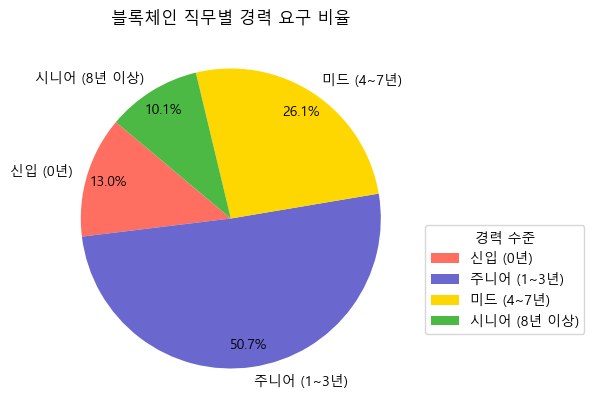

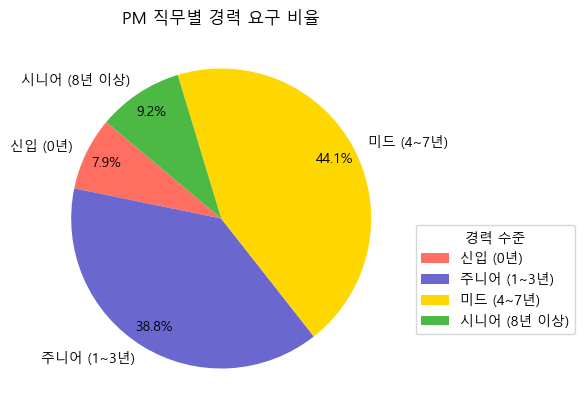

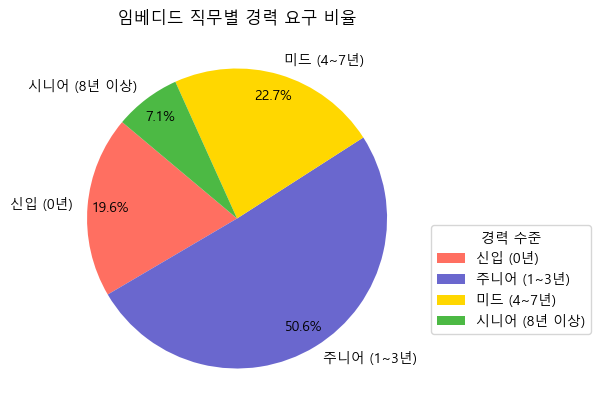

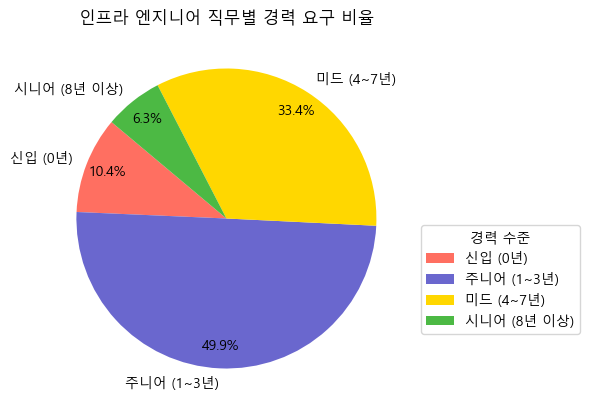

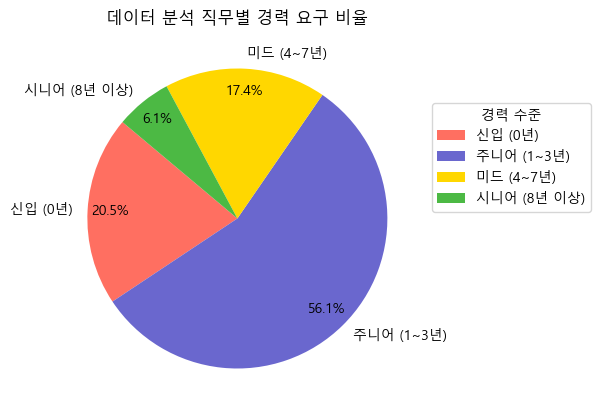

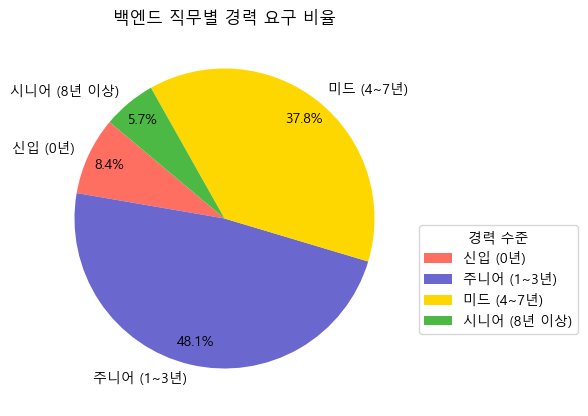

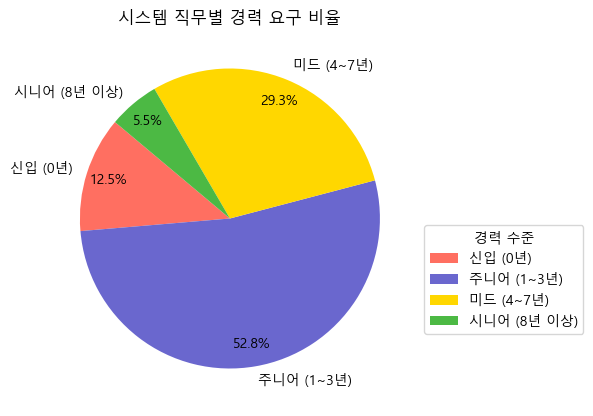

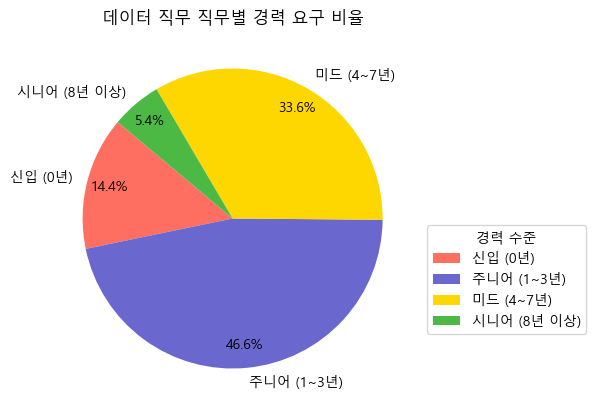

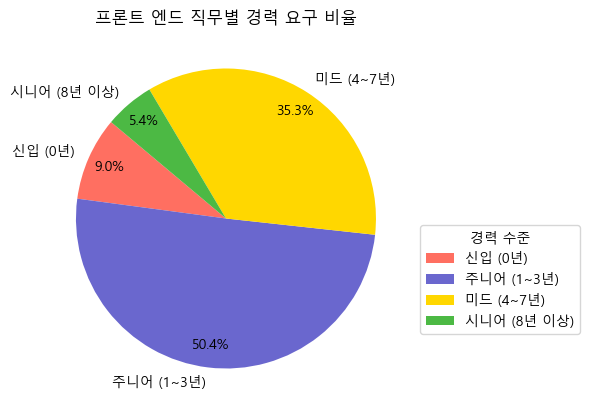

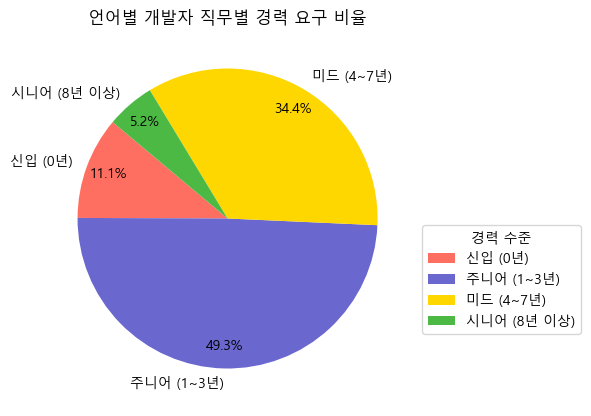

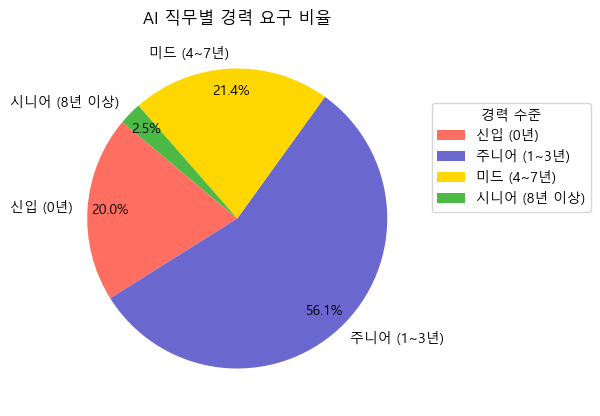

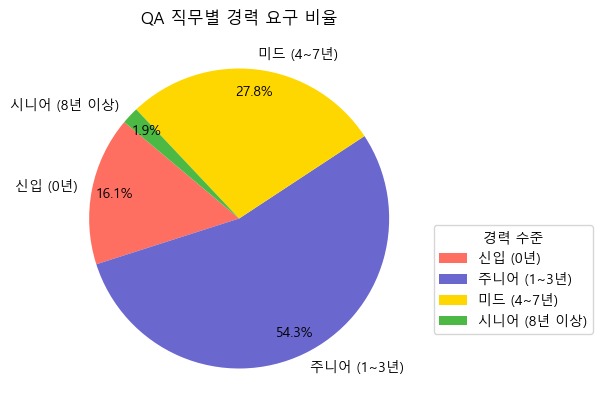

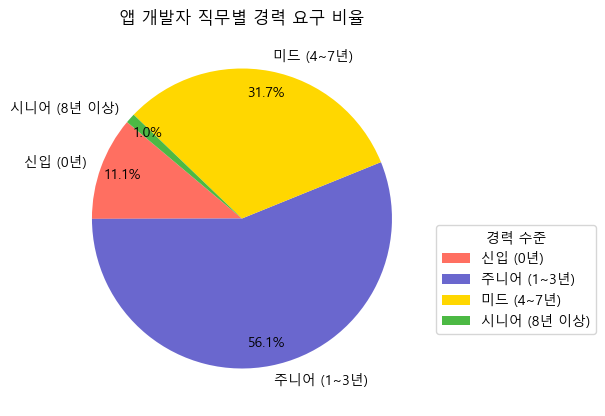

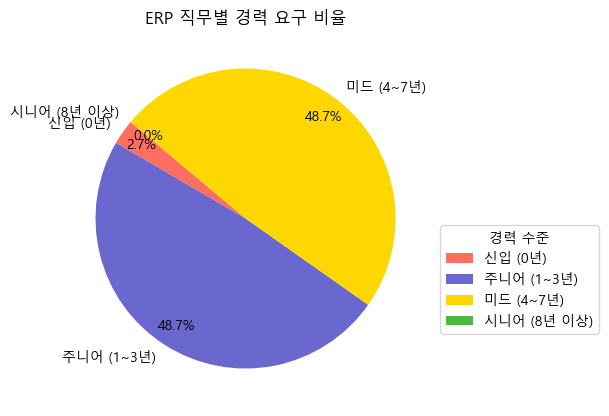

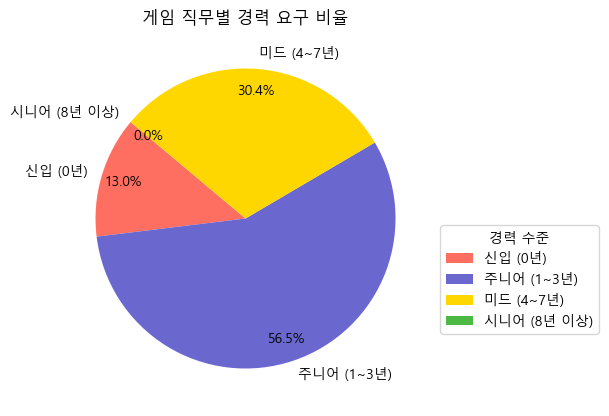

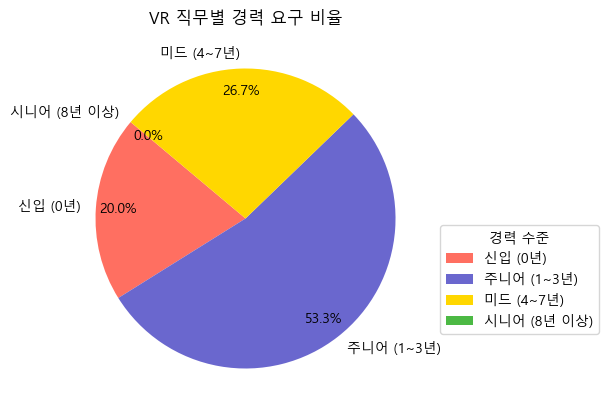

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결

# SQL 쿼리 실행 (직무별 경력 요구 비율 조회)
sql_query = """
WITH career_range AS (
    SELECT 
        category AS duty_category, 
        COUNT(*) AS total_jobs,
        SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) AS entry_level,
        SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) AS junior,
        SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) AS mid_level,
        SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) AS senior,
        ROUND(100.0 * SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS entry_percentage,
        ROUND(100.0 * SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) / COUNT(*), 2) AS junior_percentage,
        ROUND(100.0 * SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) / COUNT(*), 2) AS mid_percentage,
        ROUND(100.0 * SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) / COUNT(*), 2) AS senior_percentage
    FROM ( 
        SELECT 'PM' AS category, career FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, career FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, career FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, career FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, career FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, career FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, career FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, career FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, career FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, career FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, career FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, career FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, career FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, career FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, career FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, career FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    duty_category,
    total_jobs,
    entry_level,
    junior,
    mid_level,
    senior,
    entry_percentage,
    junior_percentage,
    mid_percentage,
    senior_percentage,
    CASE 
        WHEN senior_percentage >= 50 THEN '고급 경력직'
        WHEN mid_percentage >= 50 THEN '미드 경력직'
        WHEN junior_percentage >= 50 THEN '일반 주니어'
        ELSE '신입 가능'
    END AS career_level
FROM career_range
ORDER BY senior_percentage DESC, mid_percentage DESC, junior_percentage DESC;
"""

# 데이터 로드
df = pd.read_sql_query(sql_query, conn)
conn.close()  # DB 연결 해제

# 📌 원 그래프 (직무별 개별 시각화)
for index, row in df.iterrows():
    labels = ["신입 (0년)", "주니어 (1~3년)", "미드 (4~7년)", "시니어 (8년 이상)"]
    sizes = [row["entry_percentage"], row["junior_percentage"], row["mid_percentage"], row["senior_percentage"]]
    colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

    # 원 그래프 생성
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors, pctdistance=0.85
    )

    # 범례 추가
    ax.legend(wedges, labels, title="경력 수준", loc="best", bbox_to_anchor=(1, 0.5))
    plt.title(f"{row['duty_category']} 직무별 경력 요구 비율")
    plt.subplots_adjust(right=0.75)

    # 그래프 표시
    plt.show()


In [6]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결
cursor = conn.cursor()

# 이미지 저장 폴더 생성
output_dir = "Career_charts"
os.makedirs(output_dir, exist_ok=True)  # 폴더가 없으면 생성

# `duty_analysis` 테이블 존재 여부 확인 및 생성
cursor.execute("""
CREATE TABLE IF NOT EXISTS duty_analysis (
    duty TEXT PRIMARY KEY,
    career TEXT
);
""")
conn.commit()
print("✅ `duty_analysis` 테이블 확인 및 생성 완료")

try:
    # SQL 쿼리 실행: 직무별 경력 요구 비율 조회
    sql_query = """
    WITH career_range AS (
        SELECT 
            category AS duty_category, 
            COUNT(*) AS total_jobs,
            SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) AS entry_level,
            SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) AS junior,
            SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) AS mid_level,
            SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) AS senior,
            ROUND(100.0 * SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS entry_percentage,
            ROUND(100.0 * SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) / COUNT(*), 2) AS junior_percentage,
            ROUND(100.0 * SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) / COUNT(*), 2) AS mid_percentage,
            ROUND(100.0 * SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) / COUNT(*), 2) AS senior_percentage
        FROM ( 
            SELECT 'PM' AS category, career FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, career FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, career FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, career FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, career FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, career FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, career FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, career FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, career FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, career FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, career FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, career FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, career FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, career FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, career FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, career FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        duty_category,
        total_jobs,
        entry_level,
        junior,
        mid_level,
        senior,
        entry_percentage,
        junior_percentage,
        mid_percentage,
        senior_percentage,
        CASE 
            WHEN senior_percentage >= 50 THEN '고급 경력직'
            WHEN mid_percentage >= 50 THEN '미드 경력직'
            WHEN junior_percentage >= 50 THEN '일반 주니어'
            ELSE '신입 가능'
        END AS career_level
    FROM career_range
    ORDER BY senior_percentage DESC, mid_percentage DESC, junior_percentage DESC;
    """

    # 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()  # 한글 깨짐 방지

    # 원 그래프 생성 및 저장 (각 직무별)
    for index, row in df.iterrows():
        labels = ["신입 (0년)", "주니어 (1~3년)", "미드 (4~7년)", "시니어 (8년 이상)"]
        sizes = [row["entry_percentage"], row["junior_percentage"], row["mid_percentage"], row["senior_percentage"]]
        colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors, pctdistance=0.85
        )

        # 범례 추가
        ax.legend(wedges, labels, title="경력 수준", loc="best", bbox_to_anchor=(1, 0.5))

        # 제목 설정
        plt.title(f"{row['duty_category']} 직무별 경력 요구 비율")
        plt.subplots_adjust(right=0.75)

        # 이미지 저장 경로
        image_path = os.path.join(output_dir, f"{row['duty_category']}_경력분포.png")
        plt.savefig(image_path, bbox_inches="tight")
        plt.close(fig)

        # `duty_analysis` 테이블 업데이트 (경력 시각화 이미지 경로 저장)
        cursor.execute("""
            INSERT OR REPLACE INTO duty_analysis (duty, career) VALUES (?, ?)
        """, (row["duty_category"], image_path))
        conn.commit()

    print("✅ 모든 직무별 시각화 이미지가 저장되고 `duty_analysis` 테이블에 반영되었습니다.")

except Exception as e:
    print(f"❌ 에러 발생: {e}")

finally:
    conn.close()


✅ `duty_analysis` 테이블 확인 및 생성 완료
✅ 모든 직무별 시각화 이미지가 저장되고 `duty_analysis` 테이블에 반영되었습니다.


In [ ]:
# 단순 insert문은 덮어쓰기만 수행하므로, update로 개별 컬럼 업데이트하기
# 어제 어학능력 시각화 작업 완료, 이제 career만 업데이트해주기 

In [11]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결
cursor = conn.cursor()

# 이미지 저장 폴더 생성
output_dir = "Career_charts"
os.makedirs(output_dir, exist_ok=True)  # 폴더가 없으면 생성

# `duty_analysis` 테이블 존재 여부 확인 및 생성
cursor.execute("""
CREATE TABLE IF NOT EXISTS duty_analysis (
    duty TEXT PRIMARY KEY,
    language TEXT,
    career TEXT
);
""")
conn.commit()
print("✅ `duty_analysis` 테이블 확인 및 생성 완료")

try:
    # SQL 쿼리 실행: 직무별 경력 요구 비율 조회
    sql_query = """
    WITH career_range AS (
        SELECT 
            category AS duty_category, 
            COUNT(*) AS total_jobs,
            SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) AS entry_level,
            SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) AS junior,
            SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) AS mid_level,
            SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) AS senior,
            ROUND(100.0 * SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS entry_percentage,
            ROUND(100.0 * SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) / COUNT(*), 2) AS junior_percentage,
            ROUND(100.0 * SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) / COUNT(*), 2) AS mid_percentage,
            ROUND(100.0 * SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) / COUNT(*), 2) AS senior_percentage
        FROM ( 
            SELECT 'PM' AS category, career FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, career FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, career FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, career FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, career FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, career FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, career FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, career FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, career FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, career FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, career FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, career FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, career FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, career FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, career FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, career FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        duty_category,
        total_jobs,
        entry_level,
        junior,
        mid_level,
        senior,
        entry_percentage,
        junior_percentage,
        mid_percentage,
        senior_percentage,
        CASE 
            WHEN senior_percentage >= 50 THEN '고급 경력직'
            WHEN mid_percentage >= 50 THEN '미드 경력직'
            WHEN junior_percentage >= 50 THEN '일반 주니어'
            ELSE '신입 가능'
        END AS career_level
    FROM career_range
    ORDER BY senior_percentage DESC, mid_percentage DESC, junior_percentage DESC;
    """

    # 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()  # 한글 깨짐 방지
    cursor.execute(sql_query)
    rows = cursor.fetchall()
    print(rows)

    # 원 그래프 생성 및 저장 (각 직무별)
    for index, row in df.iterrows():
        labels = ["신입 (0년)", "주니어 (1~3년)", "미드 (4~7년)", "시니어 (8년 이상)"]
        sizes = [row["entry_percentage"], row["junior_percentage"], row["mid_percentage"], row["senior_percentage"]]
        colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors, pctdistance=0.85
        )

        # 범례 추가
        ax.legend(wedges, labels, title="경력 수준", loc="best", bbox_to_anchor=(1, 0.5))

        # 제목 설정
        plt.title(f"{row['duty_category']} 직무별 경력 요구 비율")
        plt.subplots_adjust(right=0.75)

        # 이미지 저장 경로
        image_path = os.path.join(output_dir, f"{row['duty_category']}_경력분포.png")
        plt.savefig(image_path, bbox_inches="tight")
        plt.close(fig)

        # ✅ `UPDATE`를 사용하여 `career` 칼럼만 업데이트
        cursor.execute("""
            UPDATE duty_analysis SET career = ? WHERE duty = ?
        """, (image_path, row["duty_category"]))

        # 만약 `duty_analysis` 테이블에 없는 `duty_category`라면 INSERT 수행
        cursor.execute("""
            INSERT INTO duty_analysis (duty, career)
            SELECT ?, ? WHERE NOT EXISTS (SELECT 1 FROM duty_analysis WHERE duty = ?)
        """, (row["duty_category"], image_path, row["duty_category"]))

        conn.commit()

    print("✅ 모든 직무별 시각화 이미지가 저장되고 `duty_analysis` 테이블에 반영되었습니다.")

except Exception as e:
    print(f"❌ 에러 발생: {e}")

finally:
    conn.close()


✅ `duty_analysis` 테이블 확인 및 생성 완료
[('블록체인', 69, 9, 35, 18, 7, 13.04, 50.72, 26.09, 10.14, '일반 주니어'), ('PM', 152, 12, 59, 67, 14, 7.89, 38.82, 44.08, 9.21, '신입 가능'), ('임베디드', 322, 63, 163, 73, 23, 19.57, 50.62, 22.67, 7.14, '일반 주니어'), ('인프라 엔지니어', 1238, 129, 618, 413, 78, 10.42, 49.92, 33.36, 6.3, '신입 가능'), ('데이터 분석', 132, 27, 74, 23, 8, 20.45, 56.06, 17.42, 6.06, '일반 주니어'), ('백엔드', 1310, 110, 630, 495, 75, 8.4, 48.09, 37.79, 5.73, '신입 가능'), ('시스템', 273, 34, 144, 80, 15, 12.45, 52.75, 29.3, 5.49, '일반 주니어'), ('데이터 직무', 369, 53, 172, 124, 20, 14.36, 46.61, 33.6, 5.42, '신입 가능'), ('프론트 엔드', 933, 84, 470, 329, 50, 9.0, 50.38, 35.26, 5.36, '일반 주니어'), ('언어별 개발자', 1149, 127, 567, 395, 60, 11.05, 49.35, 34.38, 5.22, '신입 가능'), ('AI', 449, 90, 252, 96, 11, 20.04, 56.12, 21.38, 2.45, '일반 주니어'), ('QA', 162, 26, 88, 45, 3, 16.05, 54.32, 27.78, 1.85, '일반 주니어'), ('앱 개발자', 287, 32, 161, 91, 3, 11.15, 56.1, 31.71, 1.05, '일반 주니어'), ('ERP', 37, 1, 18, 18, 0, 2.7, 48.65, 48.65, 0.0, '신입 가능'), ('게임', 23, 3, 1

In [12]:
import sqlite3
import openai

# ✅ OpenAI API 키 설정
openai.api_key = ""

# ✅ SQLite 데이터베이스 연결
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [13]:
# ✅ SQL 쿼리 실행하여 경력 요구 사항 데이터 가져오기 (rows 데이터 기반으로 수행)
sql_query = """
WITH career_range AS (
    SELECT 
        category AS duty_category, 
        COUNT(*) AS total_jobs,
        SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) AS entry_level,
        SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) AS junior,
        SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) AS mid_level,
        SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) AS senior,
        ROUND(100.0 * SUM(CASE WHEN career = 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS entry_percentage,
        ROUND(100.0 * SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) / COUNT(*), 2) AS junior_percentage,
        ROUND(100.0 * SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) / COUNT(*), 2) AS mid_percentage,
        ROUND(100.0 * SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) / COUNT(*), 2) AS senior_percentage,
        CASE 
            WHEN ROUND(100.0 * SUM(CASE WHEN career >= 8 THEN 1 ELSE 0 END) / COUNT(*), 2) >= 50 THEN '고급 경력직'
            WHEN ROUND(100.0 * SUM(CASE WHEN career BETWEEN 4 AND 7 THEN 1 ELSE 0 END) / COUNT(*), 2) >= 50 THEN '미드 경력직'
            WHEN ROUND(100.0 * SUM(CASE WHEN career BETWEEN 1 AND 3 THEN 1 ELSE 0 END) / COUNT(*), 2) >= 50 THEN '일반 주니어'
            ELSE '신입 가능'
        END AS career_level
    FROM ( 
        SELECT 'PM' AS category, career FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, career FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, career FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, career FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, career FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, career FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, career FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, career FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, career FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, career FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, career FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, career FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, career FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, career FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, career FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, career FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    duty_category,
    total_jobs,
    entry_level,
    junior,
    mid_level,
    senior,
    entry_percentage,
    junior_percentage,
    mid_percentage,
    senior_percentage,
    career_level
FROM career_range
ORDER BY senior_percentage DESC, mid_percentage DESC, junior_percentage DESC;
"""

# ✅ 데이터 가져오기
cursor.execute(sql_query)
rows = cursor.fetchall()

# ✅ GPT-4 API 호출하여 요약 생성 및 기존 요약을 덮어쓰기
for duty, total_jobs, entry_level, junior, mid_level, senior, entry_percentage, junior_percentage, mid_percentage, senior_percentage, career_level in rows:
    prompt = f"""
    "{duty}" 직무의 경력 요구 사항을 분석해주세요.
    - 총 채용 공고 수: {total_jobs}개
    - 신입(0년) 요구 공고 수: {entry_level}개 ({entry_percentage}%)
    - 주니어(1~3년) 요구 공고 수: {junior}개 ({junior_percentage}%)
    - 미드(4~7년) 요구 공고 수: {mid_level}개 ({mid_percentage}%)
    - 시니어(8년 이상) 요구 공고 수: {senior}개 ({senior_percentage}%)
    - 전반적인 경력 레벨: {career_level}
    
    위 정보를 바탕으로 해당 직무의 경력 요구 사항을 1~2줄로 요약해주세요.
    """

    try:
        response = openai.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}]
        )
        gpt4_summary = response.choices[0].message.content.strip()

        # ✅ 기존 career 칼럼의 값 가져오기 (이미지 경로 유지)
        cursor.execute(
            "SELECT career FROM duty_analysis WHERE duty = ?;",
            (duty,)
        )
        existing_career_data = cursor.fetchone()

        if existing_career_data:
            parts = existing_career_data[0].split(")", 1)  # ")"을 기준으로 이미지 경로와 기존 요약 분리
            image_path = parts[0] + ")" if len(parts) > 1 else existing_career_data[0]  # 이미지 경로 유지
        else:
            image_path = ""

        # ✅ `career` 값 업데이트 (기존 이미지 경로 + 새로운 GPT-4 요약)
        updated_text = f"{image_path} ({gpt4_summary})"

        cursor.execute(
            "UPDATE duty_analysis SET career = ? WHERE duty = ?;",
            (updated_text, duty)
        )
        conn.commit()

        print(f"✅ {duty} 요약 완료 (GPT-4 적용): {gpt4_summary}")

    except Exception as e:
        print(f"❌ {duty} 요약 실패: {e}")

# ✅ DB 연결 종료
conn.close()
print("🎯 모든 직무의 경력 요구 사항 요약이 GPT-4로 업데이트되었습니다.")


✅ 블록체인 요약 완료 (GPT-4 적용): 블록체인 직무는 대체로 1~3년 간의 경력을 요구하는 주니어 레벨이 가장 많으며, 신입보다는 경력자를 선호하는 경향이 있습니다.
✅ PM 요약 완료 (GPT-4 적용): PM(Participant Manager) 직무는 대체로 4~7년 경력을 요구하는 미드 레벨이 가장 많으며, 신입 또한 지원 가능한 직무입니다.
✅ 임베디드 요약 완료 (GPT-4 적용): 임베디드 직무는 특히 주니어(1~3년) 경력이 가장 많이 요구되며, 신입보다는 경험 있는 인력을 선호하는 것으로 보입니다. 또한 미드나 시니어 레벨의 경력을 요구하는 공고도 일부 있습니다.
✅ 인프라 엔지니어 요약 완료 (GPT-4 적용): "인프라 엔지니어" 직무는 주로 1~7년의 경력을 요구하며, 신입도 10.42%의 비율로 채용 공고가 있음을 확인할 수 있습니다.
✅ 데이터 분석 요약 완료 (GPT-4 적용): "데이터 분석" 직무는 주로 1~3년 경력을 가진 주니어 레벨의 전문가들을 요구하며, 신입도 약 20% 정도 차지하는 것으로 나타났다. 시니어 레벨은 전체의 약 6%으로 비교적 적은 수의 직원을 필요로 한다.
✅ 백엔드 요약 완료 (GPT-4 적용): 백엔드 직무는 대체로 주니어 레벨(1~3년)의 경력을 요구하며, 미드 레벨(4~7년)도 상당수 차지하지만 신입도 일정 부분 채용할 수 있는 모습을 보여준다.
✅ 시스템 요약 완료 (GPT-4 적용): "시스템" 직무는 주로 1~3년(주니어) 경력을 보유한 인력을 요구하며, 그 다음으로는 4~7년(미드) 경력자를 선호하는 것으로 보입니다. 일반적으로 신입보다는 경험이 있는 인력을 선호하는 경향이 있습니다.
✅ 데이터 직무 요약 완료 (GPT-4 적용): 데이터 직무에 대한 채용 공고는 주로 주니어(1~3년)를 대상으로 하며, 신입도 상당수 채용하고 있으며, 미드(4~7년) 경력자 채용도 활발한 편입니다. 시니어(8년 이상)는 상대적으로 채용 비율이 낮습니다.
✅ 프론트 엔드 요약 완료 (GPT-4 적용):

In [ ]:
# 리스트 형식으로 변환 


In [16]:
import sqlite3
import sqlite3
import re

# ✅ SQLite 데이터베이스 연결
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [19]:
import sqlite3
import re

# ✅ SQLite 데이터베이스 연결
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ✅ `duty_analysis` 테이블에서 career 및 language 데이터 조회
cursor.execute("SELECT duty, career, language FROM duty_analysis;")
rows = cursor.fetchall()

# ✅ Career 및 Language 데이터를 리스트로 변환
career_list = []
language_list = []

# ✅ 이미지 경로 추출을 위한 정규 표현식 (모든 이미지 경로는 .png로 끝남)
image_pattern = re.compile(r".+\.png")

for duty, career, language in rows:
    # ✅ Career 데이터 처리
    career_image = ""
    career_summary = ""
    
    if career:
        match = image_pattern.search(career)  # .png로 끝나는 이미지 경로 찾기
        if match:
            career_image = match.group()  # 이미지 경로 추출
            career_summary = career.replace(career_image, "").strip()  # 이미지 경로 제거 후 남은 텍스트
        else:
            career_summary = career.strip()  # 이미지 경로가 없으면 전체를 요약 텍스트로 저장
    
    career_list.append([career_image, career_summary])

    # ✅ Language 데이터 처리
    language_image = ""
    language_summary = ""

    if language:
        match = image_pattern.search(language)  # .png로 끝나는 이미지 경로 찾기
        if match:
            language_image = match.group()  # 이미지 경로 추출
            language_summary = language.replace(language_image, "").strip()  # 이미지 경로 제거 후 남은 텍스트
        else:
            language_summary = language.strip()  # 이미지 경로가 없으면 전체를 요약 텍스트로 저장

    language_list.append([language_image, language_summary])

# ✅ DB 연결 종료
conn.close()

# ✅ 결과 출력
print("📌 Career 리스트:")
for item in career_list:
    print(item)

print("\n📌 Language 리스트:")
for item in language_list:
    print(item)

[,]
['.png','설명']


📌 Career 리스트:
['Career_charts\\AI_경력분포.png', '(AI 분야의 채용 공고는 주로 1년에서 3년의 경력을 가진 주니어 직원을 찾고 있으며, 일정 수준 이상의 경력을 요구하는 경우는 흔치 않습니다.)']
['Career_charts\\ERP_경력분포.png', '(ERP 직무에 관한 공고는 주로 주니어와 미드 레벨의 경력자를 대상으로 하고 있으며, 신입도 일부 가능하다. 시니어 경력자에 대한 요구는 없는 상황이다.)']
['Career_charts\\PM_경력분포.png', '(PM(Participant Manager) 직무는 대체로 4~7년 경력을 요구하는 미드 레벨이 가장 많으며, 신입 또한 지원 가능한 직무입니다.)']
['Career_charts\\QA_경력분포.png', '("QA" 직무에서는 주로 1~3년 경력을 가진 주니어 레벨의 인력을 찾는 경향이 있으며, 그 다음으로는 4~7년 경력을 가진 미드 레벨의 인력이 요구됩니다.)']
['Career_charts\\VR_경력분포.png', '("VR" 직무는 주로 1~3년의 경력을 가진 주니어 직원을 채용하는 추세이며, 신입이나 4~7년 경력의 미드 레벨 직원도 일정 부분 채용하고 있습니다. 시니어 레벨의 경우에는 채용 공고가 없는 것으로 보아, 현재 시장에서는 그에 해당하는 경력 요구가 없어 보입니다.)']
['Career_charts\\게임_경력분포.png', '(게임 직무는 주로 1~3년차의 주니어 레벨 직원을 원하며, 신입도 일부 필요로 하는 반면, 경력이 많은 미드 레벨 이상은 적게 필요한 편입니다.)']
['Career_charts\\데이터 분석_경력분포.png', '("데이터 분석" 직무는 주로 1~3년 경력을 가진 주니어 레벨의 전문가들을 요구하며, 신입도 약 20% 정도 차지하는 것으로 나타났다. 시니어 레벨은 전체의 약 6%으로 비교적 적은 수의 직원을 필요로 한다.)']
['Career_charts\\데이터 직무_경력분포.png', '(데이터 직무에 대

In [20]:
import sqlite3
import re

# ✅ SQLite 데이터베이스 연결
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ✅ `duty_analysis` 테이블에서 career 및 language 데이터 조회
cursor.execute("SELECT duty, career, language FROM duty_analysis;")
rows = cursor.fetchall()

# ✅ Career 및 Language 데이터를 리스트로 변환하여 DB에 저장
image_pattern = re.compile(r".+\.png")

for duty, career, language in rows:
    # ✅ Career 데이터 처리
    career_image = ""
    career_summary = ""

    if career:
        match = image_pattern.search(career)  # .png로 끝나는 이미지 경로 찾기
        if match:
            career_image = match.group()  # 이미지 경로 추출
            career_summary = career.replace(career_image, "").strip()  # 이미지 경로 제거 후 남은 텍스트
        else:
            career_summary = career.strip()  # 이미지 경로가 없으면 전체를 요약 텍스트로 저장
    
    # ✅ Language 데이터 처리
    language_image = ""
    language_summary = ""

    if language:
        match = image_pattern.search(language)  # .png로 끝나는 이미지 경로 찾기
        if match:
            language_image = match.group()  # 이미지 경로 추출
            language_summary = language.replace(language_image, "").strip()  # 이미지 경로 제거 후 남은 텍스트
        else:
            language_summary = language.strip()  # 이미지 경로가 없으면 전체를 요약 텍스트로 저장

    # ✅ `duty_analysis` 테이블 업데이트 (career & language 컬럼)
    cursor.execute("""
        UPDATE duty_analysis
        SET career = ?, language = ?
        WHERE duty = ?;
    """, (f"[{career_image}, {career_summary}]", f"[{language_image}, {language_summary}]", duty))

# ✅ 변경 사항 저장
conn.commit()

# ✅ DB 연결 종료
conn.close()

print("✅ 모든 데이터가 리스트 형식으로 변환되어 DB에 저장되었습니다.")


✅ 모든 데이터가 리스트 형식으로 변환되어 DB에 저장되었습니다.
